# Datasets 

1.Combined House Data: Includes property details like bathrooms, bedrooms, city, and price estimates.

2.Home Value Forecast: Contains region-specific home value predictions.

3.Inventory for Single Family: Details the inventory available for single-family homes.

4.Rental Index: Offers data on rental trends and indices.

5.Single Family Value: Tracks the value of single-family homes over time.

Thoughts: 
Whether or not combined them togrther? Or using single dataset to analyze?

1.Combine for Comprehensive Analysis: Merge datasets where appropriate to gain a more nuanced understanding of the market. For instance, correlating home value trends with inventory levels can provide deeper insights into market dynamics.

2.Maintain Separate Analysis for Specific Goals: Keep some analyses separate when focusing on specific aspects, like detailed rental index trends or property value forecasts.

3.Ensure Data Consistency: When combining datasets, make sure they align in terms of regions, time frames, and other key variables to ensure accurate analysis.

4.Leverage Combined Data for Advanced Modeling: Use the combined data for building more complex models like predictive analytics for price estimation or risk assessment, where multiple factors come into play.

# Problem Statement

Imitate the underwriting part of Intellcre through machine learning. Now we just focus on the Single Family. 

Framework of solving the probelm:

1.Price Estimation Model: Predict current and future property values using features like location, size, condition, etc.

2.Risk Assessment Model: Evaluate investment risks based on market data and property specifics.

3.Market Trend Analysis: Analyze historical and current market data to identify trends in single-family home sales and prices.

4.Financial Metrics Calculation: Develop algorithms to calculate IRR, Cap Rate, Cash Flow, ROI, and NPV for investment analysis.

# Data Preprocessing

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
combined_house_data_df= pd.read_csv('Combined_house_data.csv')

# For numeric columns, use mean
for col in combined_house_data_df.select_dtypes(include=['float64', 'int64']):
    combined_house_data_df[col].fillna(combined_house_data_df[col].mean(), inplace=True)

# For categorical columns, use mode (most frequent value)
for col in combined_house_data_df.select_dtypes(include=['object']):
    combined_house_data_df[col].fillna(combined_house_data_df[col].mode()[0], inplace=True)

# Remove duplicate rows
combined_house_data_df.drop_duplicates(inplace=True)

combined_house_data_df.head()

# Save the preprocessed dataframe
combined_house_data_df.to_csv('/Users/mac/Downloads/preprocessed_Combined_house_data.csv', index=False)


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Preprocessing 'Home Value Forecast' dataset
home_value_forecast_df = pd.read_csv('home value forcast.csv')

# Handling missing values, duplicates
for col in home_value_forecast_df.columns:
    if home_value_forecast_df[col].dtype == 'object':
        home_value_forecast_df[col].fillna(home_value_forecast_df[col].mode()[0], inplace=True)
    else:
        home_value_forecast_df[col].fillna(home_value_forecast_df[col].mean(), inplace=True)

home_value_forecast_df.drop_duplicates(inplace=True)

home_value_forecast_df.to_csv('/Users/mac/Downloads/preprocessed_home_value_forecast.csv', index=False)

home_value_forecast_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,BaseDate,2023-10-31,2023-12-31,2024-09-30
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,2023-09-30,0.3,0.2,0.1
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,2023-09-30,0.8,0.9,0.0
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,2023-09-30,0.1,-0.2,0.3
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2023-09-30,-0.4,-1.2,-0.7
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,2023-09-30,0.1,-0.1,0.3


In [3]:
inventory_single_family_df = pd.read_csv('inventory for single family.csv')

for col in inventory_single_family_df.columns:
    if inventory_single_family_df[col].dtype == 'object':
        inventory_single_family_df[col].fillna(inventory_single_family_df[col].mode()[0], inplace=True)
    else:
        inventory_single_family_df[col].fillna(inventory_single_family_df[col].mean(), inplace=True)

inventory_single_family_df.drop_duplicates(inplace=True)

inventory_single_family_df.to_csv('/Users/mac/Downloads/preprocessed_inventory_single_family.csv', index=False)
inventory_single_family_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,102001,0,United States,country,TX,1256841.0,1326695.0,1412965.0,1479262.0,1527468.0,...,855050.0,786883.0,734757.0,734588.0,742155.0,774262.0,801169.0,825009.0,844705.0,853099.0
1,394913,1,"New York, NY",msa,NY,52726.0,57399.0,62374.0,66396.0,68302.0,...,30558.0,27246.0,24844.0,24646.0,24955.0,25893.0,26405.0,26465.0,26021.0,25235.0
2,753899,2,"Los Angeles, CA",msa,CA,17825.0,19309.0,20822.0,22059.0,23397.0,...,16357.0,14676.0,13379.0,13155.0,13074.0,13363.0,13508.0,13558.0,13634.0,13653.0
3,394463,3,"Chicago, IL",msa,IL,29930.0,32526.0,35219.0,36854.0,38278.0,...,24278.0,21479.0,19609.0,19674.0,20028.0,21008.0,21656.0,21896.0,22070.0,22057.0
4,394514,4,"Dallas, TX",msa,TX,22961.0,24748.0,27040.0,29241.0,31113.0,...,19202.0,17809.0,16390.0,16320.0,17220.0,19181.0,20894.0,21860.0,22333.0,22366.0


In [4]:
rental_index_df = pd.read_csv('rental index.csv')

for col in rental_index_df.columns:
    if rental_index_df[col].dtype == 'object':
        rental_index_df[col].fillna(rental_index_df[col].mode()[0], inplace=True)
    else:
        rental_index_df[col].fillna(rental_index_df[col].mean(), inplace=True)

rental_index_df.drop_duplicates(inplace=True)

rental_index_df.to_csv('/Users/mac/Downloads/preprocessed_rental_index.csv', index=False)
rental_index_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-01-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1606.206406,...,1994.653463,2027.438438,2042.237444,2049.325559,2016.531345,2023.438976,2031.558202,2046.144009,2053.486247,2055.771355
1,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,1257.814660,...,1749.697900,1738.217986,1747.305840,1758.407295,1758.891075,1762.980879,1771.751591,1779.338402,1795.384582,1799.631140
2,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,1404.698197,...,1701.217520,1706.900064,1706.067787,1723.722320,1735.484670,1752.132904,1756.990323,1754.429516,1757.602011,1755.031490
3,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,1404.698197,...,1419.480272,1458.063897,1471.726681,1466.734658,1456.175660,1462.478506,1466.267391,1490.237063,1488.180414,1494.366097
4,62093,7,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,1404.698197,...,2935.808220,2895.699421,2873.209025,2881.906361,2913.546218,2963.964134,3005.735342,3034.413822,3064.476503,3079.585783


In [5]:
single_family_value_df = pd.read_csv('single family value.csv')


for col in single_family_value_df.columns:
    if single_family_value_df[col].dtype == 'object':
        single_family_value_df[col].fillna(single_family_value_df[col].mode()[0], inplace=True)
    else:
        single_family_value_df[col].fillna(single_family_value_df[col].mean(), inplace=True)

single_family_value_df.drop_duplicates(inplace=True)

single_family_value_df.to_csv('/Users/mac/Downloads/preprocessed_single_family_value.csv', index=False)
single_family_value_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,211350.388584,...,478179.012640,475970.080041,474667.638719,473625.231742,474825.487986,476817.471032,479936.049402,482732.878253,485218.588379,487049.229137
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,167027.529943,...,646084.597109,648128.677374,649835.600486,652492.360333,657843.109262,665694.651989,674765.407666,684562.737841,693919.603854,704310.381974
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,103369.860765,...,283933.753348,281503.677613,279162.380779,277305.006476,276111.180933,275632.600770,276013.333140,276775.332650,277672.045986,278203.447451
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,300592.864300,...,876651.133833,876575.891432,875183.544676,872805.690618,869768.397642,866836.040353,863739.247846,862587.057107,862329.896556,861773.858220
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,102232.176100,...,275459.440928,273891.019336,272285.588209,270954.060901,270155.911598,270008.250822,270603.834290,271446.840808,272315.723551,272738.070485


# Price Estimate Model

## 1. Combining Datasets

Combining Datasets for Price Estimation Model:

Combined House Data + Single Family Value: By merging these two, we can get a comprehensive view of single-family homes, combining specific property features with value data. Now we used 'city' and 'state' as the key to combine them together. 

In addition, we are focusing on the single family, so we need to filter dataset"combined house data" which has a column named "hometype". 

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

combined_house_data = pd.read_csv('preprocessed_Combined_house_data.csv')
home_value_forecast = pd.read_csv('preprocessed_home_value_forecast.csv')
inventory_single_family = pd.read_csv('preprocessed_inventory_single_family.csv')
rental_index = pd.read_csv('preprocessed_rental_index.csv')
single_family_value = pd.read_csv('preprocessed_single_family_value.csv')

In [7]:
# Filtering the 'Combined House Data' for only single-family homes
single_family_combined_data = combined_house_data[combined_house_data['homeType'] == 'SINGLE_FAMILY']

#transform the columns form
single_family_value.rename(columns={'City': 'city','State':'state'}, inplace=True)

# Perform the merge again with the filtered data
merged_single_family_dataset = pd.merge(single_family_combined_data, single_family_value, on=['city', 'state'], how='inner')

# Displaying the first few rows of the newly merged dataset
merged_single_family_dataset.head()

# Save the merged dataset to a CSV file
merged_single_family_dataset.to_csv('merged_single_family_dataset.csv', index=False)


In [8]:
# Displaying the first few rows of the newly merged dataset
merged_single_family_dataset.head()

,bathrooms,bedrooms,city,country,currency,daysOnZillow,homeStatus,homeStatusForHDP,homeType,isFeatured,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,2,3,San Jose,USA,USD,0,FOR_SALE,FOR_SALE,SINGLE_FAMILY,False,...,1.288097e+06,1.281148e+06,1.267343e+06,1.250395e+06,1.240987e+06,1.241502e+06,1.249771e+06,1.267510e+06,1.292656e+06,1.321156e+06
1,2,3,San Jose,USA,USD,0,FOR_SALE,FOR_SALE,SINGLE_FAMILY,False,...,1.014766e+06,1.007794e+06,9.974897e+05,9.867186e+05,9.819169e+05,9.836937e+05,9.905729e+05,1.003506e+06,1.020581e+06,1.039260e+06
2,2,3,San Jose,USA,USD,0,FOR_SALE,FOR_SALE,SINGLE_FAMILY,False,...,9.943514e+05,9.876939e+05,9.784917e+05,9.686004e+05,9.647665e+05,9.666187e+05,9.734724e+05,9.858462e+05,1.003377e+06,1.022783e+06
3,2,3,San Jose,USA,USD,0,FOR_SALE,FOR_SALE,SINGLE_FAMILY,False,...,1.050973e+06,1.046033e+06,1.035655e+06,1.022714e+06,1.014534e+06,1.012191e+06,1.015880e+06,1.026014e+06,1.040651e+06,1.056238e+06
4,2,3,San Jose,USA,USD,0,FOR_SALE,FOR_SALE,SINGLE_FAMILY,False,...,1.707833e+06,1.692248e+06,1.665201e+06,1.634505e+06,1.618723e+06,1.620055e+06,1.635814e+06,1.664422e+06,1.695740e+06,1.727514e+06


This dataset merged based on the 'city' and 'state'coulumns.This merging has created a dataset that combines property-specific features from 'combined house data' with regional value data from'single family value' dataset. 

## 2. Clean data

In [9]:
# 1: Handle Missing Values
# Calculate the percentage of missing values in each column
missing_percentage = merged_single_family_dataset.isnull().mean() * 100

# Columns with a high percentage of missing values might be dropped
columns_to_drop_due_to_missing = missing_percentage[missing_percentage > 50].index.tolist()

# Dropping these columns
cleaned_dataset = merged_single_family_dataset.drop(columns=columns_to_drop_due_to_missing)

# 2: Remove Irrelevant Columns
# Identifying columns that may not be relevant for the model (like text-based columns, redundant info, etc.)
irrelevant_columns = ['country', 'currency', 'homeStatusForHDP', 'isFeatured', 'listing_sub_type', 'unit']
cleaned_dataset = cleaned_dataset.drop(columns=irrelevant_columns, errors='ignore')

# 3: Check for Duplicates
# Dropping duplicate rows if any
cleaned_dataset = cleaned_dataset.drop_duplicates()

# Displaying the new shape of the dataset and the columns dropped
cleaned_dataset_shape = cleaned_dataset.shape
dropped_columns = columns_to_drop_due_to_missing + irrelevant_columns

cleaned_dataset_shape, dropped_columns


((24221, 321),
 ['country',
  'currency',
  'homeStatusForHDP',
  'isFeatured',
  'listing_sub_type',
  'unit'])

## 3. EDA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1: Descriptive Statistics for the numerical columns
descriptive_stats = cleaned_dataset.describe()

In [11]:
# 2: Correlation Analysis:how different features correlate with the 'price' 
correlation_with_price = cleaned_dataset.corr()['price'].sort_values(ascending=False)

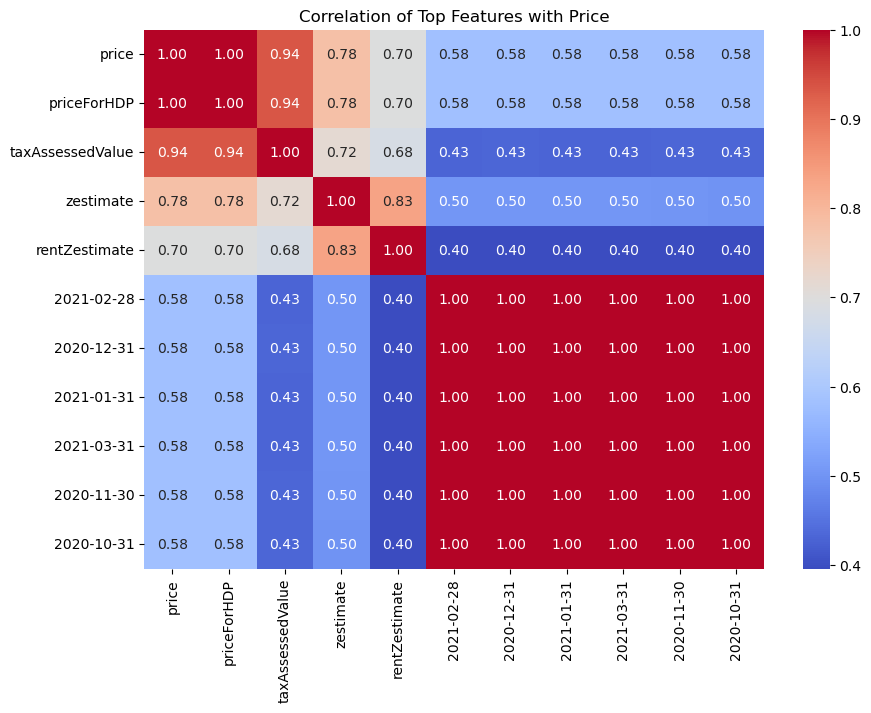

In [12]:
# Visualize the top 10 features with price 
top_corr_features = correlation_with_price.head(11).index 
plt.figure(figsize=(10, 7))
sns.heatmap(cleaned_dataset[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Top Features with Price")
plt.show()

Through this heatmap, we can found:
priceforhdp ~ zestimate
TaxAssessedValue
RentZestimat
Historical Value Data: Certain historical data points (like '2021-02-28', '2020-12-31'...)

We will use these indexes to analyze because it shows a strong predictor.

In [13]:
# Display the statistics and top correlations
descriptive_stats, correlation_with_price.head(10)

(          bathrooms      bedrooms  daysOnZillow      latitude     longitude  \
 count  24221.000000  24221.000000  24221.000000  24221.000000  24221.000000   
 mean       2.765534      3.460179      5.877627     32.571881   -102.656398   
 std        1.224466      0.979788     25.324359      8.898142     29.173938   
 min        0.000000      0.000000     -1.000000      0.000000   -123.601030   
 25%        2.000000      3.000000     -1.000000     29.825768   -122.042370   
 50%        3.000000      3.000000      0.000000     37.243324   -121.086040   
 75%        3.000000      4.000000      0.000000     37.795246    -95.441630   
 max       14.000000     11.000000    798.000000     44.191265      0.000000   
 
               price   priceForHDP  rentZestimate     zestimate       zipcode  \
 count  2.422100e+04  2.422100e+04   24221.000000  2.422100e+04  24221.000000   
 mean   1.257459e+06  1.257459e+06    3869.400231  9.662086e+05  81785.587796   
 std    1.659197e+06  1.659197e+06 

Bathrooms and Bedrooms: The average number of bathrooms and bedrooms in single-family homes are around 2.76 and 3.46
Price: The average price of a single-family home in our dataset is approximately $1.26 million, but there's quite a range, with some homes priced as high as nearly $50 million

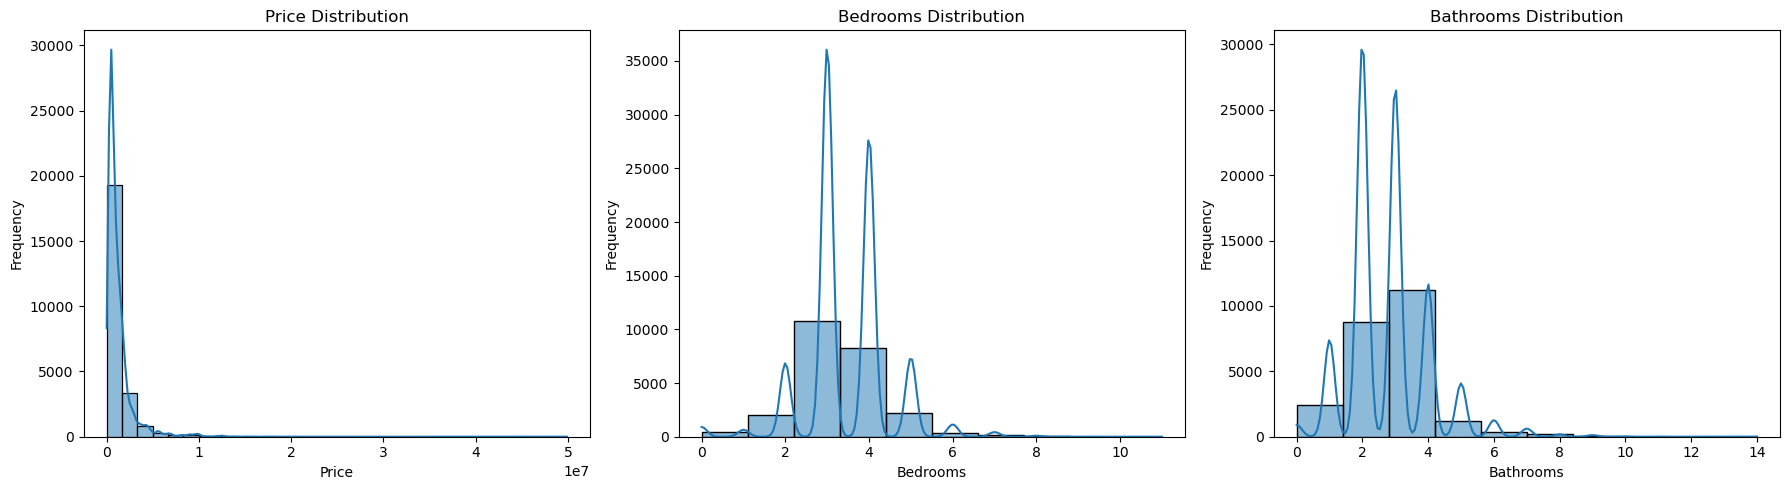

In [14]:
# Histograms for Price, Bedrooms, and Bathrooms
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Price Distribution
sns.histplot(cleaned_dataset['price'], bins=30, ax=axs[0], kde=True)
axs[0].set_title('Price Distribution')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')

# Bedrooms Distribution
sns.histplot(cleaned_dataset['bedrooms'], bins=10, ax=axs[1], kde=True)
axs[1].set_title('Bedrooms Distribution')
axs[1].set_xlabel('Bedrooms')
axs[1].set_ylabel('Frequency')

# Bathrooms Distribution
sns.histplot(cleaned_dataset['bathrooms'], bins=10, ax=axs[2], kde=True)
axs[2].set_title('Bathrooms Distribution')
axs[2].set_xlabel('Bathrooms')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Price Distribution: a right_skewed distribution(most homes are in the lower price range, with a few homes having very high prices)

Bedrooms and Bathrooms Distribution:more balanced, though there's a tendency towards homes with 3-4 bedrooms and 2-3 bathrooms.

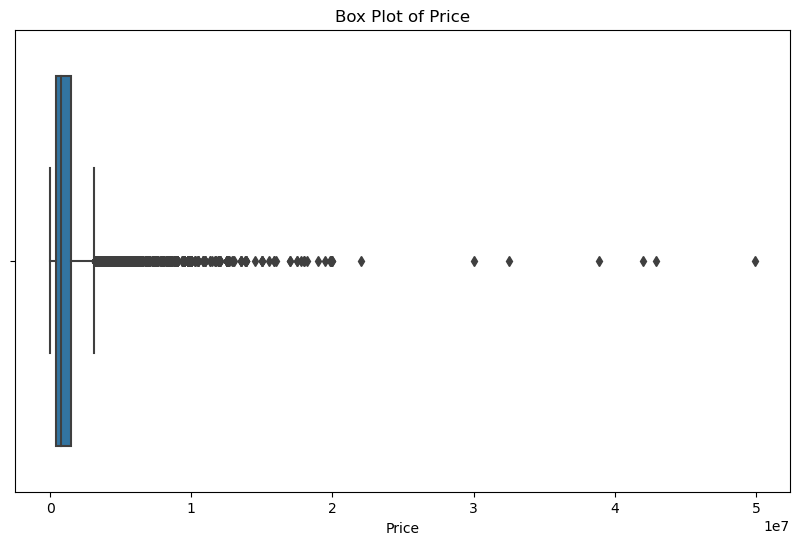

In [15]:
# Box Plot for Price to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_dataset['price'])
plt.title("Box Plot of Price")
plt.xlabel('Price')
plt.show()

Several outliers:the right-skewed distribution(there are some homes with prices significantly higher than the majority)

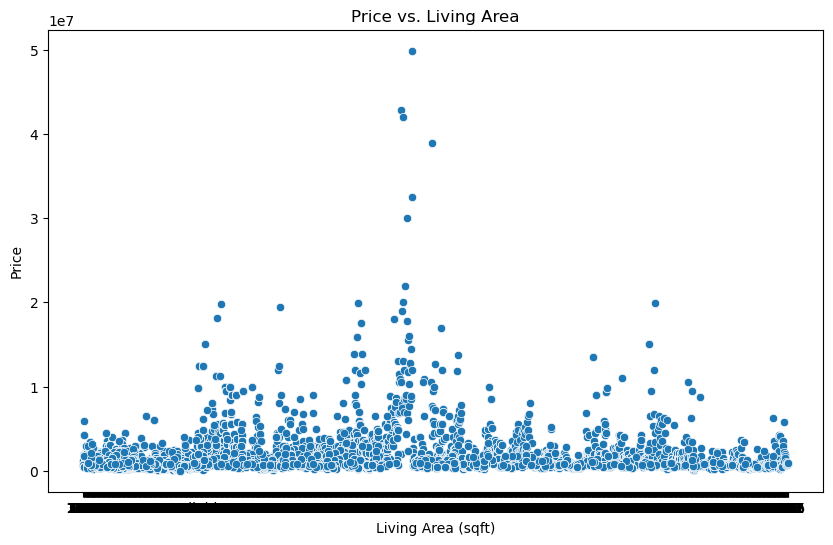

In [16]:
# Scatter Plot of Price vs. Living Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='livingArea', y='price', data=cleaned_dataset)
plt.title('Price vs. Living Area')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()

The scatter plot: positive correlation. Larger homes tend to have higher prices, which is a logical trend.

## 4. Modeling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separating the features and the target variable
X = cleaned_dataset.drop('price', axis=1)
y = cleaned_dataset['price']

# Identifying all categorical columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Applying One-Hot Encoding to all categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Feature Scaling with 'with_mean=False'
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


# Load the dataset
dataset = pd.read_csv('merged_single_family_dataset.csv')

# Select a subset of features for simplicity
selected_features = ['bathrooms', 'bedrooms', 'city']
target_column = dataset.columns[-1]  # Assuming the target is the last column

X = dataset[selected_features]
y = dataset[target_column]

# Preproces for numerical data
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# for categorical data
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing together
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=0),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=0)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train and evaluate models
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model)])
        pipeline.fit(X_train, y_train)
        predictions = pipeline.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        results[name] = rmse
    return results

# Train and evaluate the models
model_results = train_and_evaluate(models, X_train, y_train, X_test, y_test)
print(model_results)


{'Linear Regression': 304400.92992623785, 'Random Forest': 310427.0877636133, 'Gradient Boosting': 363765.8584035556}


In [19]:
param_dist = {
    'n_estimators': np.arange(100, 201, 50),  
    'max_depth': [None, 10, 20] }

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='neg_mean_squared_error')

random_search.fit(X_train_scaled, y_train)

# Best parameters
best_params = random_search.best_params_
print("Best parameters:", best_params)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A Nu

[CV] END ...................max_depth=None, n_estimators=150; total time=15.5min
[CV] END .....................max_depth=10, n_estimators=150; total time=12.6min
[CV] END .....................max_depth=20, n_estimators=100; total time=10.8min
[CV] END ...................max_depth=None, n_estimators=150; total time=15.5min
[CV] END .....................max_depth=10, n_estimators=150; total time=12.6min
[CV] END .....................max_depth=20, n_estimators=100; total time=10.8min
[CV] END ...................max_depth=None, n_estimators=100; total time=10.2min
[CV] END .....................max_depth=10, n_estimators=100; total time= 8.2min
[CV] END .....................max_depth=10, n_estimators=150; total time=12.6min
[CV] END .....................max_depth=20, n_estimators=150; total time=15.0min
[CV] END ...................max_depth=None, n_estimators=100; total time=10.1min
[CV] END ...................max_depth=None, n_estimators=200; total time=21.3min
[CV] END ...................

In [34]:
X = cleaned_dataset.drop('price', axis=1)
y = cleaned_dataset['price']

categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)
X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#used the best parameter 
rf_optimized = RandomForestRegressor(n_estimators=150, max_depth=None, random_state=42)
rf_optimized.fit(X_train_scaled, y_train)

# predict on test
y_pred_optimized = rf_optimized.predict(X_test_scaled)

mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)

print(f"Optimized Mean Squared Error: {mse_optimized}")
print(f"Optimized Root Mean Squared Error: {rmse_optimized}")


Optimized Mean Squared Error: 2184104212.2691655
Optimized Root Mean Squared Error: 46734.400737242424


In [36]:
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),  
    'max_depth': [None] + list(range(5, 51, 5)),  
    'min_samples_split': range(2, 21, 2),  
    'min_samples_leaf': range(1, 21, 2), 
    'max_features': ['auto', 'sqrt', 'log2'] 
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1,
                                   scoring='neg_mean_squared_error')

random_search.fit(X_train_scaled, y_train)

best_params = random_search.best_params_
print("Best parameters:", best_params)

rf_optimized = RandomForestRegressor(**best_params, random_state=42)
rf_optimized.fit(X_train_scaled, y_train)

y_pred_optimized = rf_optimized.predict(X_test_scaled)

mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
print(f"Optimized Mean Squared Error: {mse_optimized}")
print(f"Optimized Root Mean Squared Error: {rmse_optimized}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A Nu

KeyboardInterrupt: 

In [30]:
# Extract the best estimator
best_model = random_search.best_estimator_

# Predictions on the test set
predictions = best_model.predict(X_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Optimized Model Test RMSE:", rmse)


Optimized Model Test RMSE: 310623.54542944697
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; tota

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.0s
[CV] END max_depth=30, max_features

[CV] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=30, max_featu

# Marketing Trend Analysis

To analyze market trends for single-family homes, we'll focus on identifying patterns in sales, prices, and inventory over time. This analysis can involve:

1.Time Series Analysis: Examine how prices and sales volumes have changed over time.

2.Seasonal Trends: Identify any seasonal patterns in the housing market.

3.Correlation Analysis: Investigate the relationship between market trends and external factors like interest rates or economic indicators.